# Proyecto de Sprint 6

**Dentro del proyecto de este Sprint 6 se va a trabajar en 6 secciones de acuerdo a las intrucciones descritas en plataforma. Las secciones corresponden a la siguientes descripciones:**

1) Carga de datos con los que trabajaremos.

2) Preparación de datos.

3) Análisis de datos.

4) Creación de perfil de usuario para cada región (NA, UE, JP). Dicho perfil describe los siguientes elementos: 

4.1) Descipción de variaciones en cuotas de mercado de una región a otra. 

4.2) Los 5 géneros principales dentro de estas regiones citadas.

4.3) Un análisis de relación si el ESRB afecta las ventas en regiones individuales. 

5) Pruebas de hipótesis. 

6) Conclusión general.


## 1) Datos 

In [98]:
import pandas as pd
from matplotlib import pyplot as plt
from importlib import reload
plt = reload(plt)
import numpy as np
from scipy import stats as st
import seaborn as sns
import statsmodels.api as sm

### Construyendo el dataframe:

In [8]:
data = pd.read_csv('C:/Users/gabri/OneDrive/TripleTen/Curso/Sprint 6/games.csv')
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


## 2) Preparación de datos

In [10]:
data.columns = data.columns.str.lower()
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### Convirtiendo datos a formatos necesarios: 

En este caso se hará una conversión de los datos pertenecientes a la columna year_of_release, primero verificamos si hay valores faltantes. 

In [12]:
print(data['year_of_release'].isna().sum())

269


In [ ]:
# Como tenemos 269 valores faltantes, voy a proceder a remplazar ese valor con una leyenda de "missing":

data['year_of_release'] = data['year_of_release'].fillna("Missing")


# Convertir solo los valores numéricos (dejando "Missing" intacto)
data['year_of_release'] = (
    pd.to_numeric(data['year_of_release'], errors='coerce') 
    .fillna("Missing")  
)

mask = data['year_of_release'].apply(lambda x: isinstance(x, (int, float)))  
data.loc[mask, 'year_of_release'] = data.loc[mask, 'year_of_release'].astype(int)

**Ahora ya tenemos el año correctamente expresado en el dataframe**

*Nota: No eliminé filas, y le di este tratamiento, porque no quise reducir el número de datos a trabajar.*

Este problema se pudo haber dado por errores de captura. 

In [18]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


## 3) Análisis de datos

#### **¿Cuantos juegos fueron lanzados en distintos años?**

1) El intervalo de tiempo en el que estamos trabajando es viende desde 1980 hasta 2016.

In [ ]:
#Primero vemos el intervalo en el que están situados los datos:

max_year = int(pd.to_numeric(data['year_of_release'], errors='coerce').max())
min_year = int(pd.to_numeric(data['year_of_release'], errors='coerce').min())

print(max_year)
print(min_year)

2016
1980


2) Mediante un histograma de frecuencias, vamos a ver el comportamiento del número de juegos producidos a través del tiempo. 

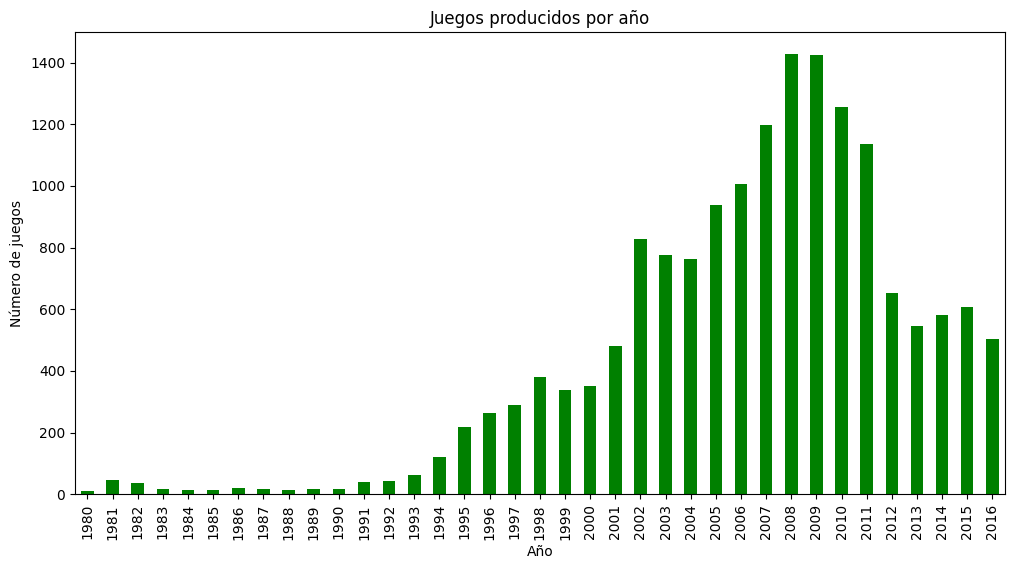

In [27]:
# Primero creamos un filtro
count_by_year = data[pd.to_numeric(data['year_of_release'], errors='coerce').notna()] \
                .groupby('year_of_release').size()

# Gráficamente:
count_by_year.plot(kind='bar', figsize=(12, 6), color='green')
plt.xlabel('Año')
plt.ylabel('Número de juegos')
plt.title('Juegos producidos por año')
plt.show()

**Con esta distribución podemos ver que el periodo donde más se produjo juegos (y quizá el mejor periodo en términos de ingreso) fue de 2005 a 2012. Esto se puede deber a los gustos y preferencias de los consumidores, calidad e innovación en las plataformas que predominaban esos años, los títulos que que producían los desarrolladores, precios, etc.**

#### Ventas totales con respecto a las plataformas

In [74]:
ventas_plat_tot = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']


ventas_plat_tot0 = pd.DataFrame({
    'Juego': data['name'],
    'Plataforma' : data['platform'],
    'Ventas_NA': data['na_sales'],
    'Ventas_EU': data['eu_sales'],
    'Ventas_JP': data['jp_sales'],
    'Ventas_Otros': data['other_sales'],
    'Ventas_Totales': ventas_plat_tot,
    'Año de lanzamiento': data['year_of_release'],
    'Puntaje crítico': data['critic_score']})

ventas_plat_tot0
    
    



,Juego,Plataforma,Ventas_NA,Ventas_EU,Ventas_JP,Ventas_Otros,Ventas_Totales,Año de lanzamiento,Puntaje crítico
0,Wii Sports,Wii,41.36,28.96,3.77,8.45,82.54,2006,76.0
1,Super Mario Bros.,NES,29.08,3.58,6.81,0.77,40.24,1985,NaN
2,Mario Kart Wii,Wii,15.68,12.76,3.79,3.29,35.52,2008,82.0
3,Wii Sports Resort,Wii,15.61,10.93,3.28,2.95,32.77,2009,80.0
4,Pokemon Red/Pokemon Blue,GB,11.27,8.89,10.22,1.00,31.38,1996,NaN
...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,0.00,0.00,0.01,0.00,0.01,2016,NaN
16711,LMA Manager 2007,X360,0.00,0.01,0.00,0.00,0.01,2006,NaN
16712,Haitaka no Psychedelica,PSV,0.00,0.00,0.01,0.00,0.01,2016,NaN
16713,Spirits & Spells,GBA,0.01,0.00,0.00,0.00,0.01,2003,NaN


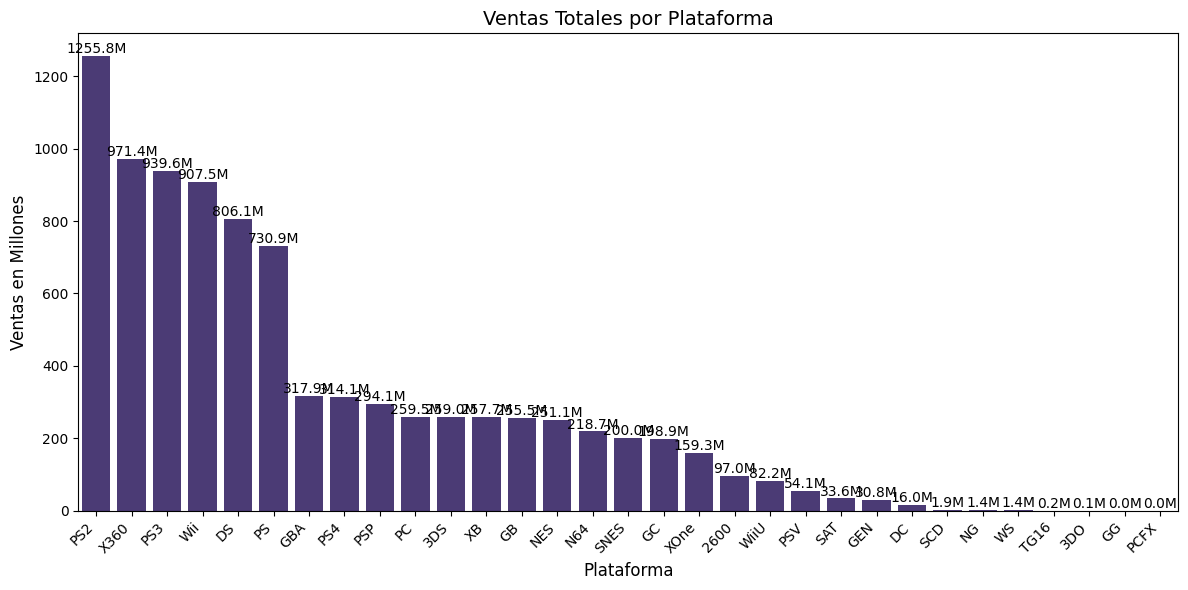

In [99]:
ventas_filtradas = ventas_plat_tot0[pd.to_numeric(ventas_plat_tot0['Ventas_Totales'], errors='coerce').notna()]

#Agrupación de datos
ventas_por_plataforma = ventas_filtradas.groupby('Plataforma')['Ventas_Totales'].sum().sort_values(ascending=False)

#Gráficamente
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x=ventas_por_plataforma.index,
    y=ventas_por_plataforma.values,
    color=sns.color_palette("viridis")[0]  
)


plt.title('Ventas Totales por Plataforma', fontsize=14)
plt.xlabel('Plataforma', fontsize=12)
plt.ylabel('Ventas en Millones', fontsize=12)
plt.xticks(rotation=45, ha='right')


for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}M', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()


**Con estos resultados tenemos que las principales consolas o plataformas que vendieron más juegos en total son:**

**- El Play Station 2.**

**- XBOX 360.**

**-Play Station 3.**

**-Nintendo Wii.**

**-Nintendo DS.**

**-Play Station 1.**

--> Se va a trabajar con datos desde 2002 hasta 2012, estos 10 años representa la mayor concentración de producción de juegos dentro del dataframe.

C:\Users\gabri\AppData\Local\Temp\ipykernel_23904\3799662786.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


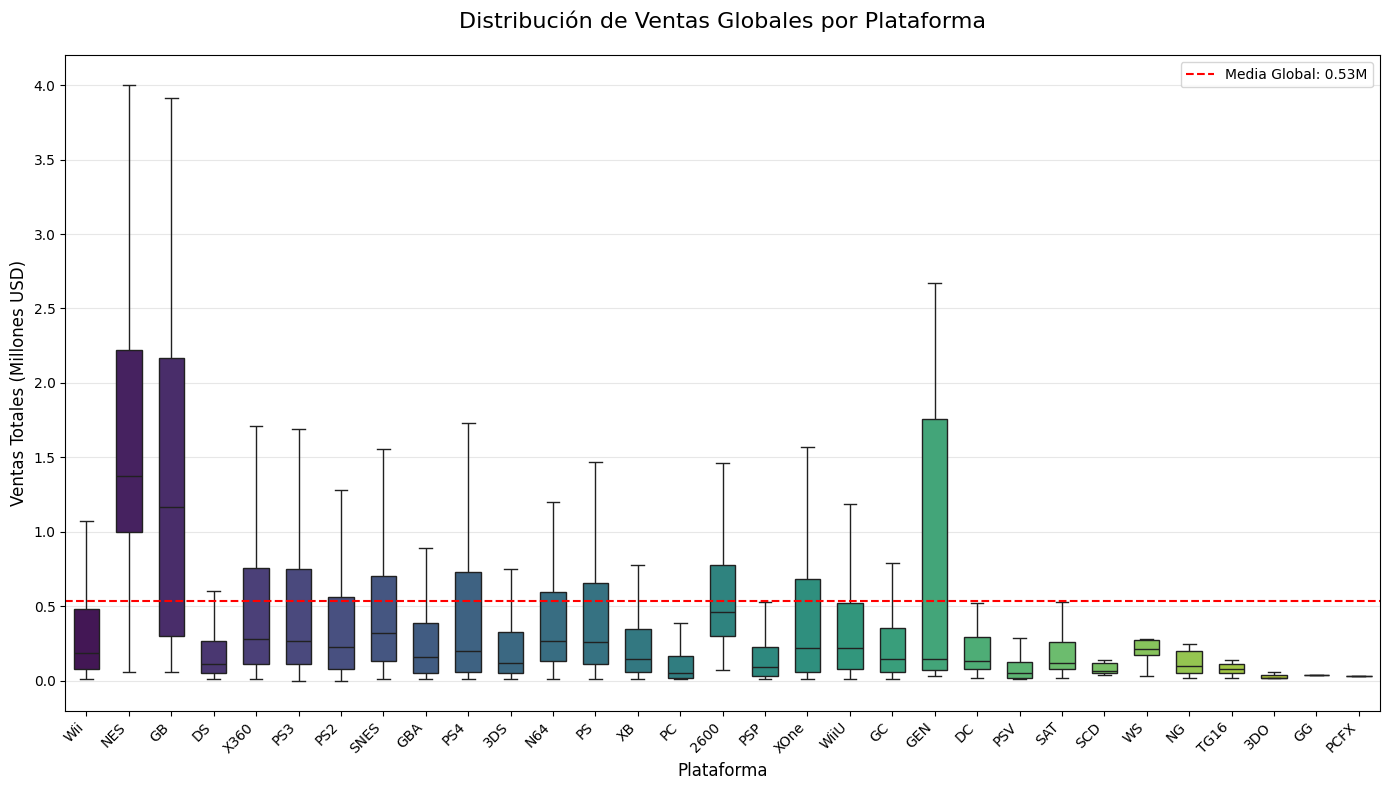

In [100]:
df_clean = ventas_plat_tot0.dropna(subset=['Ventas_Totales', 'Plataforma']).copy()
df_clean['Ventas_Totales'] = pd.to_numeric(df_clean['Ventas_Totales'], errors='coerce')


plt.figure(figsize=(14, 8))
sns.boxplot(
    data=df_clean,
    x='Plataforma',
    y='Ventas_Totales',
    palette='viridis',
    showfliers=False,  # Excluir outliers
    width=0.6  # Ancho de las cajas
)


plt.title('Distribución de Ventas Globales por Plataforma', 
          fontsize=16, pad=20)
plt.xlabel('Plataforma', fontsize=12)
plt.ylabel('Ventas Totales (Millones USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')


mean_val = df_clean['Ventas_Totales'].mean()
plt.axhline(mean_val, color='red', linestyle='--', 
            label=f'Media Global: {mean_val:.2f}M')


plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


**Lo que nos díce el gráfico**

Según los resultados, las ventas más altas las tiene la plataforma GEN, NES y GB; son impresionantes las ventas del Nintendo (NES), al igual que la Génesis (GEN) y Game Boy(GM). Como interpretación se puede comentar que quizá esto se deba al tema de la competencia en el mercado de video juegos, que si nos centramos en los años cúspide en la cual esas plataformas estaban en el mercado, los datos nos sugieren una estructura de mercado de duopolio. Cuando avanza la tecnología y existen innovaciones tecnológicas, la competencia parece convertirse en un oligopolio; ya que microsoft entra al mercado y se ve una especie de estandarización en términos de ventas.

En cuanto a las más rentables, se diría que todas, ya que son empresas grandes, que entran en la competencia con sus respectivas estrategias de mercado, si vemos más de cerca los datos, nintendo ha tenido quizá más lanzamientos, lo que segmenta su propio mercado. Y en este análisis se toman en cuenta todas las plataformas, en términos de rentabilidad, porque los juegos de PC son más bien bienes complementarios al uso de las computadoras, no es el producto central en el mercado de las PC.

### ¿Cómo las reseñas de jugadores afectan las ventas totales?

In [ ]:
# Filtrado de datos
df_regr = ventas_plat_tot0.dropna(subset=['Puntaje crítico', 'Ventas_Totales'])

#Definimos variables para la regresión
X = df_regr['Puntaje crítico']  # Variable independiente
y = df_regr['Ventas_Totales']    # Variable dependiente

# Añadimos una constante (intercepto) a X
X = sm.add_constant(X)

# Ajuste del modelo de regresión
modelo = sm.OLS(y, X).fit()


print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:         Ventas_Totales   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     521.8
Date:              mar., 15 abr. 2025   Prob (F-statistic):          5.49e-112
Time:                        14:33:59   Log-Likelihood:                -16152.
No. Observations:                8137   AIC:                         3.231e+04
Df Residuals:                    8135   BIC:                         3.232e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.5185      0.099    -

*Para esta parte del análisis recurría a hacer una regresión por mínimos cuadrados ordinarios para saber cómo immpacta la opinión de los jugadores profesionales en cuanto a las ventas totales de los juegos.*

*En este caso, el modelo solamente nos arroja que su opinión tiene una relevancia del 6% cuando se trata de ventas totales. Por otro lado, la prueba Durbin-Watson nos indica que tenemos un problema de correlación serial en nuestro residuos del modelo.*

*En este caso, podemos concluir que la opinión en de los jugadores profesionales, tiene un peso muy ligero a la hora de las decisiones de compra de otros consumidores*

*Gráficamente*

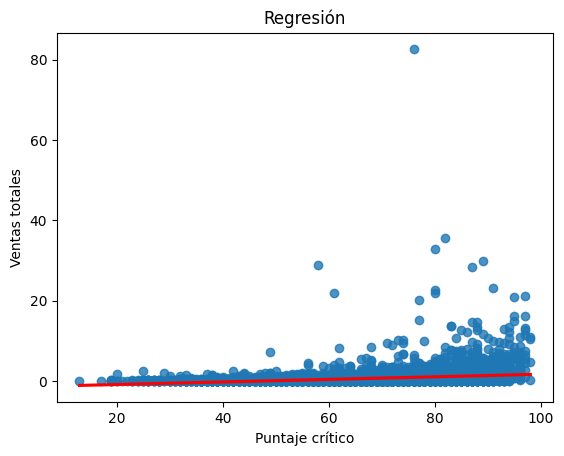

In [101]:
sns.regplot(x='Puntaje crítico', y='Ventas_Totales', data=df_regr, ci=None, line_kws={'color': 'red'})
plt.title('Regresión')
plt.xlabel('Puntaje crítico')
plt.ylabel('Ventas totales')
plt.show()

### Perfil por región

#### a) Para las plataformas con mayor demanda en los tres diferentes mercados dentro del análisis:


--- Top 5 Plataformas en Norte América ---
platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64

--- Top 5 Plataformas en Europa ---
platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64

--- Top 5 Plataformas en Japón ---
platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64


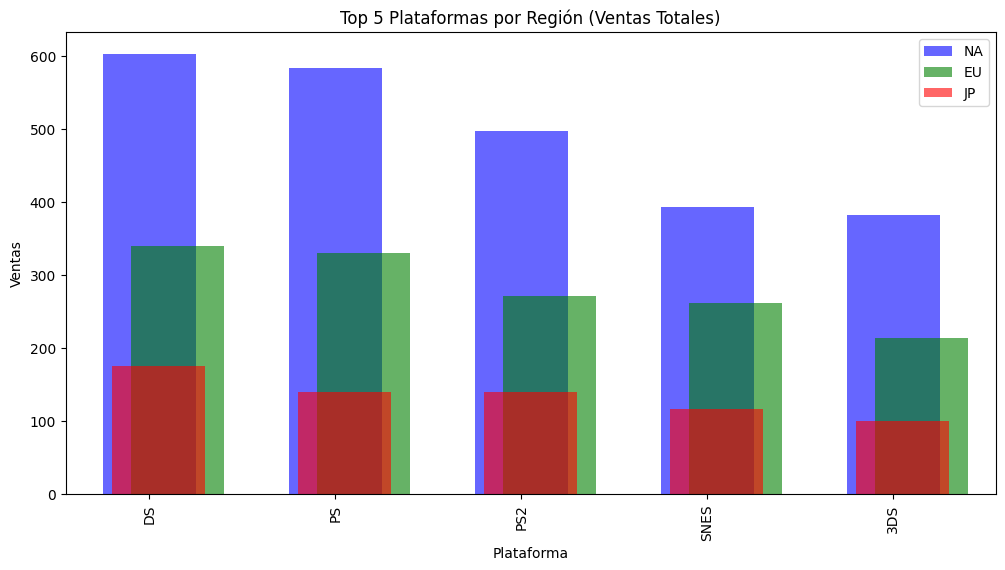

In [102]:
df_zona = data.dropna(subset=['platform', 'na_sales', 'eu_sales', 'jp_sales', 'genre', 'rating'])

def top_platforms(region_sales_col, region_name):
    top = data.groupby('platform')[region_sales_col].sum().nlargest(5)
    print(f"\n--- Top 5 Plataformas en {region_name} ---\n{top}")
    return top

top_na = top_platforms('na_sales', 'Norte América')
top_eu = top_platforms('eu_sales', 'Europa')
top_jp = top_platforms('jp_sales', 'Japón')

plt.figure(figsize=(12, 6))
top_na.plot(kind='bar', color='blue', alpha=0.6, label='NA')
top_eu.plot(kind='bar', color='green', alpha=0.6, label='EU', position=0.2)
top_jp.plot(kind='bar', color='red', alpha=0.6, label='JP', position=0.4)
plt.title('Top 5 Plataformas por Región (Ventas Totales)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas')
plt.legend()
plt.show()

Como se puede ver, los gustos y preferencias de los consumidores dentro del mercado donde se ven inscritos varía, esto puede ser por cuestiones culturales propias a al momento y al lugar en donde se ejerce la venta de juegos.

#### b) Para los géneros con más demanda:

**En este caso vamos a usar un gráfico de pastel para ver la segmentación de la demanda dentro de los mercados en cuestión.**

*Y como se puede ver en los gráficos que esbozan la demanda de los géneros de los juegos, vemos que el comportamiento del consumidor, en cuanto a géneros, es muy similar; tenemos que subrayar que el comportamiento de en el consumo de géneros de videojuegos es diferente al comportamiento en el consumo de plataformas.*


--- Top 5 Géneros en Norte América ---
genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64

--- Top 5 Géneros en Europa ---
genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64

--- Top 5 Géneros en Japón ---
genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64


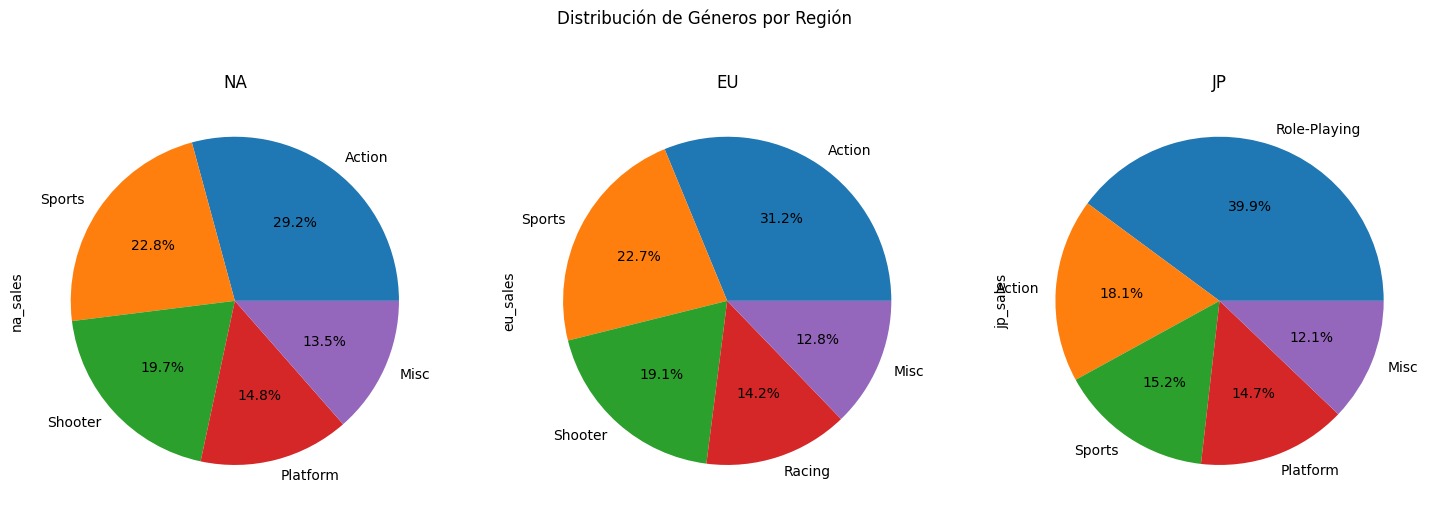

In [104]:
df_zona = data.dropna(subset=['platform', 'na_sales', 'eu_sales', 'jp_sales', 'genre', 'rating'])

def top_genres(region_sales_col, region_name):
    top = data.groupby('genre')[region_sales_col].sum().nlargest(5)
    print(f"\n--- Top 5 Géneros en {region_name} ---\n{top}")
    return top

top_na_genres = top_genres('na_sales', 'Norte América')
top_eu_genres = top_genres('eu_sales', 'Europa')
top_jp_genres = top_genres('jp_sales', 'Japón')

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
top_na_genres.plot(kind='pie', ax=axes[0], autopct='%1.1f%%', title='NA')
top_eu_genres.plot(kind='pie', ax=axes[1], autopct='%1.1f%%', title='EU')
top_jp_genres.plot(kind='pie', ax=axes[2], autopct='%1.1f%%', title='JP')
plt.suptitle('Distribución de Géneros por Región')
plt.show()


#### ¿Cómo afectan los comentarios profesionales por zona?

**Para este efecto, tenemos que la relevancia de los comentarios en relación con las ventas es relativamente bajo, pero vamos a ver en qué mercado afecta un poco más este factor, para esto, se realizan 3 regresiones por mínimos cuadrados ordinarios:**

In [110]:

df_regr_na = ventas_plat_tot0.dropna(subset=['Puntaje crítico', 'Ventas_NA'])

#Definimos variables para la regresión
X = df_regr_na['Puntaje crítico']  
y = df_regr_na['Ventas_NA']   

# Añadimos una constante (intercepto) a X
X = sm.add_constant(X)

# Ajuste del modelo de regresión
modelo = sm.OLS(y, X).fit()


print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:              Ventas_NA   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     500.5
Date:              mar., 15 abr. 2025   Prob (F-statistic):          1.22e-107
Time:                        15:25:52   Log-Likelihood:                -10413.
No. Observations:                8137   AIC:                         2.083e+04
Df Residuals:                    8135   BIC:                         2.084e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.7150      0.049    -

In [109]:
df_regr_jp = ventas_plat_tot0.dropna(subset=['Puntaje crítico', 'Ventas_JP'])

#Definimos variables para la regresión
X = df_regr_jp['Puntaje crítico']  
y = df_regr_jp['Ventas_JP']   

# Añadimos una constante (intercepto) a X
X = sm.add_constant(X)

# Ajuste del modelo de regresión
modelo = sm.OLS(y, X).fit()


print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:              Ventas_JP   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     193.9
Date:              mar., 15 abr. 2025   Prob (F-statistic):           1.39e-43
Time:                        15:25:42   Log-Likelihood:                -645.72
No. Observations:                8137   AIC:                             1295.
Df Residuals:                    8135   BIC:                             1309.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.1451      0.015     

In [108]:
df_regr_eu = ventas_plat_tot0.dropna(subset=['Puntaje crítico', 'Ventas_EU'])

#Definimos variables para la regresión
X = df_regr_eu['Puntaje crítico']  
y = df_regr_eu['Ventas_EU']   

# Añadimos una constante (intercepto) a X
X = sm.add_constant(X)

# Ajuste del modelo de regresión
modelo = sm.OLS(y, X).fit()


print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:              Ventas_EU   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     416.7
Date:              mar., 15 abr. 2025   Prob (F-statistic):           2.24e-90
Time:                        15:25:26   Log-Likelihood:                -7654.9
No. Observations:                8137   AIC:                         1.531e+04
Df Residuals:                    8135   BIC:                         1.533e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.4860      0.035    -

**Para analizar la fuerza de los comentarios en el consumo de juegos en cada mercado, solo nos vamos a fijar en el valor de R cuadrado, y vemos que en el mercado de Europa es similar que en el mercado americano, mientas que en el mercado japonés este tiene solamente un valor explicativo del 2.3%, o sea que es mucho menos relevante la opinión de jugadores profesionales en contexto de consumo de juegos.**

## 4) Pruebas de Hipótesis

Para esta parte nos trasladamos desde la opinión de jugadores profesionales a la calificación que dan los consumidores de una manera general.

4.1)  *Trabajando con un nivel de confianza de 95%, enunciamos que:*

H0: Las **calificaciones promedio** de los usuarios para las plataformas Xbox One y PC son las mismas.

H1: Las **calificaciones promedio** de los usuarios para las plataformas Xbox One y PC son distintas. 


4.2) *Trabajando con un nivel de confianza de 95%, enunciamos que:*

H0: Las **calificaciones promedio** de los usuarios para los géneros de Acción y Deportes son diferentes.

H1: Las **calificaciones promedio** de los usuarios para los géneros de Acción y Deportes son las mismas.

##### Como lo que estamos haciendo es comparando medias de dos grupos, procedemos a usar el estadístico t de student.

4.1) 

In [115]:

prueb_hip1 = data.dropna(subset=['platform', 'user_score']).copy()


prueb_hip1['user_score'] = pd.to_numeric(prueb_hip1['user_score'], errors='coerce')


prueb_hip1 = prueb_hip1.dropna(subset=['user_score'])


xbone = prueb_hip1[prueb_hip1['platform'] == 'XOne']['user_score']
pc = prueb_hip1[prueb_hip1['platform'] == 'PC']['user_score']


alpha = 0.05


results = st.ttest_ind(xbone, pc, equal_var=False)


print('valor p:', results.pvalue / 2)


if results.pvalue / 2 < alpha and results.statistic > 0:
    print("Rechazamos la hipótesis nula.")
else:
    print("No podemos rechazar la hipótesis nula.")


valor p: 2.467536180091787e-06
No podemos rechazar la hipótesis nula.


4.2)

In [116]:
prueb_hip2 = data.dropna(subset=['genre', 'user_score']).copy()

prueb_hip2['user_score'] = pd.to_numeric(prueb_hip2['user_score'], errors='coerce')
prueb_hip2 = prueb_hip1.dropna(subset=['user_score'])

action = prueb_hip2[prueb_hip2['genre'] == 'Action']['user_score']
sports = prueb_hip2[prueb_hip2['genre'] == 'Sports']['user_score']

aplha = 0.05
results = st.ttest_ind(action, sports, equal_var=False)


print('valor p:', results.pvalue / 2)


if results.pvalue / 2 < alpha and results.statistic > 0:
    print("Rechazamos la hipótesis nula.")
else:
    print("No podemos rechazar la hipótesis nula.")

valor p: 0.05741909395749143
No podemos rechazar la hipótesis nula.


## 5) Conclusiones generales


Este análisis lleva a la conclusión de que, hablando de manera general, el avance de la tecnología importa mucho cuando se trata en el mercado de video juegos, ya que los datos nos proponen un comportamiento distinto en las ventas en función del año; en este caso no eliminé ningún intervalo para poder llegar a esta conclusión, ya que las ventas se comportan de manera distinta a razón de la competencia y la propia oferta de videojuegos va cambiando (eso lo vemos con las preferencias de consumo de videojuegos en distintos mercados).

También se abordó que la opinión de los jugadores profesionales, si bien no es totalmente ignorada, esta tiene una leve influencia en términos explicativos de las preferencias del consumidor: este análisis es importante porque dicha opinión se puede magnificar si se estudia bajo qué condiciones estos jugadores ejercen su juicio sobre los juegos y cómo es que lo difunden. Esto para hacer trabajo de marketing y darle peso a la difusión de opiniones y ya luego se puede ver si aumenta o disminuye el valor que estamos buscando.

Además, el consumo de plataformas resultó ser distinta al consumo de géneros de juegos, podemos decir que los juegos se consumen de una manera más genral, mientras que las plataformas seguramente tengan variables culturales, temporales, precios, facilidad de adquicisión, etc. 

